In [74]:
import mlflow

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(experiment_name="a2")


<Experiment: artifact_location='mlflow-artifacts:/994780120796082677', creation_time=1757611194593, experiment_id='994780120796082677', last_update_time=1757611194593, lifecycle_stage='active', name='a2', tags={}>

In [75]:
# importing necessary libraries 
import matplotlib.pyplot as plt # matplotlib for plotting and figures plot
import pandas as pd  # pandas for data frame 
import seaborn as sns # seaborn for heatmap, countplot, boxplot
import numpy as np # numpy for array, matrix calculations 
import warnings
warnings.filterwarnings('ignore') # to ignore all warning

In [76]:
#__version__ to check versions of libraries
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.1.3', '2.2.3', '0.13.2', '3.10.0')

In [77]:
# reading csv file through pandas 
df = pd.read_csv('../app/data/Cars.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [78]:
# printing 5 data from top
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [79]:
# printing shape (row, col)
df.shape

(8128, 13)

In [80]:
# dataframe describing
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [81]:
# checking data types and null count information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [82]:
# checking all available columns in dataframe
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [83]:
# renaming all columns to work with naming conventions easily
df.rename(columns = {
    'name': 'name', 
    'year': 'year',
    'selling_price': 'sell_price', 
    'km_driven': 'km', 
    'fuel': 'fuel', 
    'seller_type': 'sell_type',
    'transmission': 'transmission', 
    'owner': 'owner', 
    'mileage': 'mileage', 
    'engine': 'engine', 
    'max_power': 'max_power', 
    'torque': 'torque',
    'seats': 'seats'
}, inplace=True)

df.columns

Index(['name', 'year', 'sell_price', 'km', 'fuel', 'sell_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats'],
      dtype='object')

In [84]:
# printing only owner column from dataframe
df['owner']

0                First Owner
1               Second Owner
2                Third Owner
3                First Owner
4                First Owner
                ...         
8123             First Owner
8124    Fourth & Above Owner
8125             First Owner
8126             First Owner
8127             First Owner
Name: owner, Length: 8128, dtype: object

In [85]:
#printing unique names of owner column without repeatation
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [86]:
# replacing string with numeric value to predict 
df['owner'] = df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
})

In [87]:
# checking whole dataframe
df

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [88]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [89]:
# deleting rows with name LPG 
df = df[df['fuel'] != 'LPG']
df['fuel']

0       Diesel
1       Diesel
2       Petrol
3       Diesel
4       Petrol
         ...  
8123    Petrol
8124    Diesel
8125    Diesel
8126    Diesel
8127    Diesel
Name: fuel, Length: 8090, dtype: object

In [90]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [91]:
df = df[df['fuel'] != 'CNG']
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [92]:
df

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [93]:
df['mileage']

0        23.4 kmpl
1       21.14 kmpl
2        17.7 kmpl
3        23.0 kmpl
4        16.1 kmpl
           ...    
8123     18.5 kmpl
8124     16.8 kmpl
8125     19.3 kmpl
8126    23.57 kmpl
8127    23.57 kmpl
Name: mileage, Length: 8033, dtype: object

In [94]:
# spliting string and taking first index of the splited string 
df['mileage'] = df['mileage'].str.split(' ').str[0]
df['mileage']

0        23.4
1       21.14
2        17.7
3        23.0
4        16.1
        ...  
8123     18.5
8124     16.8
8125     19.3
8126    23.57
8127    23.57
Name: mileage, Length: 8033, dtype: object

In [95]:
# checking data type of mileage column
df['mileage'].dtype


dtype('O')

In [96]:
# changing mileage column from object to float
df['mileage'] = df['mileage'].astype(float)
df['mileage'].dtype

dtype('float64')

In [97]:
df['engine']

0       1248 CC
1       1498 CC
2       1497 CC
3       1396 CC
4       1298 CC
         ...   
8123    1197 CC
8124    1493 CC
8125    1248 CC
8126    1396 CC
8127    1396 CC
Name: engine, Length: 8033, dtype: object

In [98]:
df['engine'] = df['engine'].str.split(' ').str[0]
df['engine']

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8123    1197
8124    1493
8125    1248
8126    1396
8127    1396
Name: engine, Length: 8033, dtype: object

In [99]:
df['engine'] = df['engine'].astype(float)   # changing data type of engine from object to float

In [100]:
df

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0


In [101]:
df['max_power'] =  df['max_power'].str.split(' ').str[0]
df['max_power']

0           74
1       103.52
2           78
3           90
4         88.2
         ...  
8123     82.85
8124       110
8125      73.9
8126        70
8127        70
Name: max_power, Length: 8033, dtype: object

In [102]:
df['max_power'] = df['max_power'].astype(float)

In [103]:
df['max_power'].dtype

dtype('float64')

In [104]:
df

,name,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [105]:
df['name'] = df['name'].str.split(' ').str[0]   #splitting and taking first index 0 as to get only brand names
df['name']

0        Maruti
1         Skoda
2         Honda
3       Hyundai
4        Maruti
         ...   
8123    Hyundai
8124    Hyundai
8125     Maruti
8126       Tata
8127       Tata
Name: name, Length: 8033, dtype: object

In [106]:
df.rename(columns={'name':'brand'}, inplace=True)   # changing naming convention from name to brand # inplace True to change main data set
df

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,190Nm@ 2000rpm,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0


In [107]:
df.drop(columns=['torque'], inplace=True) # dropping column torque from dataframe 
df

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [108]:
df['owner'].unique()


array([1, 2, 3, 4, 5])

In [109]:
df['owner'].dtype

dtype('int64')

In [110]:
df = df[df['owner'] != 5]   # deleting row of owner column with integer 5
df['owner']

0       1
1       2
2       3
3       1
4       1
       ..
8123    1
8124    4
8125    1
8126    1
8127    1
Name: owner, Length: 8028, dtype: int64

In [111]:
df['owner'].unique()

array([1, 2, 3, 4])

In [112]:
df['sell_price']

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: sell_price, Length: 8028, dtype: int64

In [113]:
# x - features (x1, x2, x3)
# y - label (price)
#scaler transform
y = np.log(df['sell_price'])
y

0       13.017003
1       12.821258
2       11.970350
3       12.323856
4       11.775290
          ...    
8123    12.676076
8124    11.813030
8125    12.853176
8126    12.577636
8127    12.577636
Name: sell_price, Length: 8028, dtype: float64

In [114]:
df

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


<Axes: xlabel='fuel', ylabel='count'>

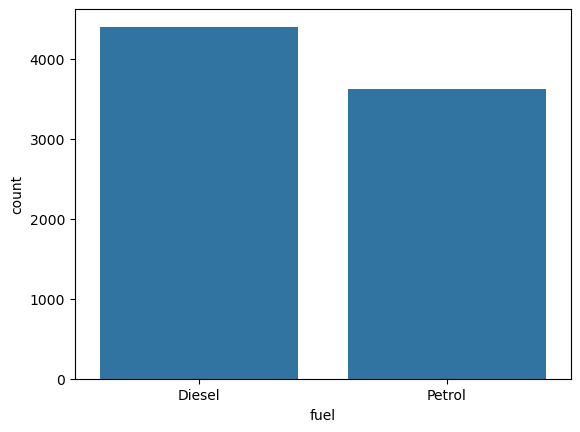

In [115]:
# checking count of the dataframe fuel column using seaborn countplot
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

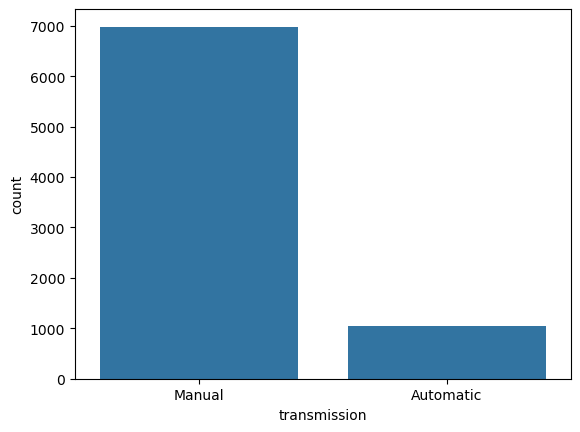

In [116]:
sns.countplot(data = df, x = 'transmission')

Text(0.5, 0, 'Fuel')

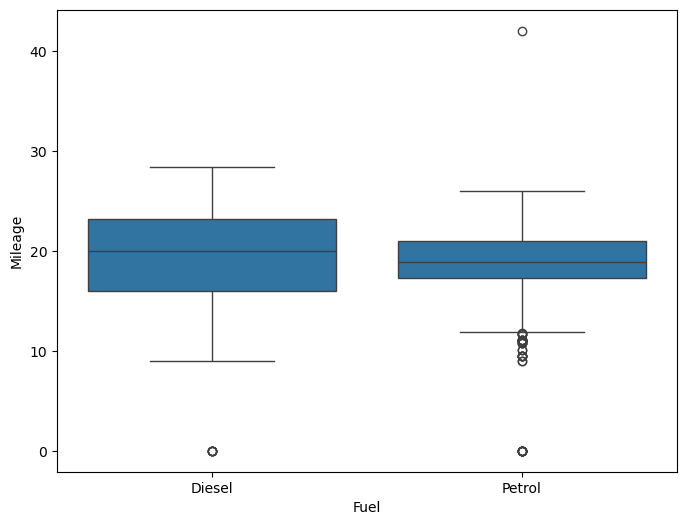

In [117]:
# providing figure size to display
plt.figure(figsize=(8,6))
sns.boxplot(x = df['fuel'], y= df['mileage'])   # displaying fuel and mileage column in boxplot 
plt.ylabel('Mileage')
plt.xlabel('Fuel')

<Axes: xlabel='seats', ylabel='count'>

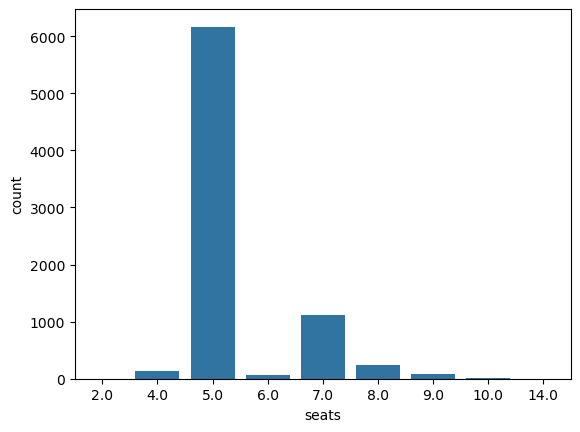

In [118]:
sns.countplot(data = df, x = 'seats')

<Axes: xlabel='owner', ylabel='count'>

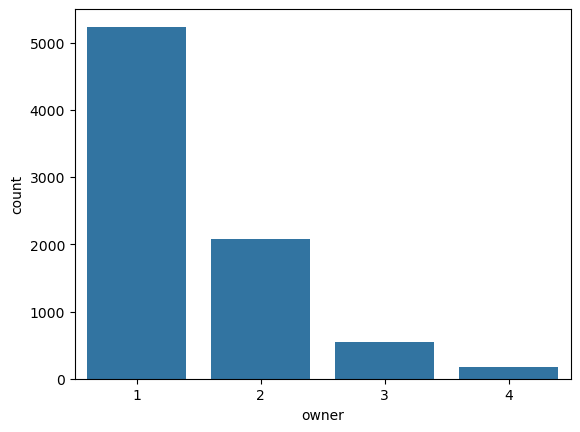

In [119]:
sns.countplot(data = df, x = 'owner')

In [120]:
df

,brand,year,sell_price,km,fuel,sell_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,320000,110000,Petrol,Individual,Manual,1,18.50,1197.0,82.85,5.0
8124,Hyundai,2007,135000,119000,Diesel,Individual,Manual,4,16.80,1493.0,110.00,5.0
8125,Maruti,2009,382000,120000,Diesel,Individual,Manual,1,19.30,1248.0,73.90,5.0
8126,Tata,2013,290000,25000,Diesel,Individual,Manual,1,23.57,1396.0,70.00,5.0


In [121]:
print(df['fuel'].unique())
print(df['transmission'].unique())
print(df['brand'].unique())


['Diesel' 'Petrol']
['Manual' 'Automatic']
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [122]:
# using scikit learn preprocessing LabelEncoder to change string data to numberic array of number [0,1,2,3] to predict y
from sklearn.preprocessing import LabelEncoder
import pickle # import pickle to save trained model and use easily when necessary 

le = LabelEncoder()

df['fuel'] = le.fit_transform(df['fuel'])
print("Fuel mapping:", dict(zip(le.classes_, le.transform(le.classes_))))   # change data to numeric array [0,1,2,3] in ascending order a-z and then showing which array shows which string data for clarification

df['transmission'] = le.fit_transform(df['transmission'])
print("Transmission mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

df['sell_type'] = le.fit_transform(df['sell_type'])
print("Sell Type mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

df['brand'] = le.fit_transform(df['brand'])
print("Brand mapping:", dict(zip(le.classes_, le.transform(le.classes_))))

# le_brand = LabelEncoder()
# le_fuel = LabelEncoder()
# le_sell = LabelEncoder()

# 0 = Diesel, 1 = Petrol (because fit-transform transforms value as per ascending order)
# df['fuel'] = le.fit_transform(df['fuel'])   
# df['transmission'] = le.fit_transform(df['transmission'])
# df['sell_type'] = le.fit_transform(df['sell_type'])
# df['brand'] = le.fit_transform(df['brand'])
# # changing variables to numeric type to make sure column values work in predict cases because only numeric value can be used in prediction
# print(df['fuel'].unique())
# print(df['transmission'].unique())
# print(df['sell_type'].unique())
# print(df['brand'].unique())


# #load Model
# pickle.dump(le_brand, open("../model/le_brand.pkl", "wb"))
# pickle.dump(le_fuel, open("../model/le_fuel.pkl", "wb"))
# pickle.dump(le_sell, open("../model/le_sell.pkl", "wb"))

Fuel mapping: {'Diesel': np.int64(0), 'Petrol': np.int64(1)}
Transmission mapping: {'Automatic': np.int64(0), 'Manual': np.int64(1)}
Sell Type mapping: {'Dealer': np.int64(0), 'Individual': np.int64(1), 'Trustmark Dealer': np.int64(2)}
Brand mapping: {'Ambassador': np.int64(0), 'Ashok': np.int64(1), 'Audi': np.int64(2), 'BMW': np.int64(3), 'Chevrolet': np.int64(4), 'Daewoo': np.int64(5), 'Datsun': np.int64(6), 'Fiat': np.int64(7), 'Force': np.int64(8), 'Ford': np.int64(9), 'Honda': np.int64(10), 'Hyundai': np.int64(11), 'Isuzu': np.int64(12), 'Jaguar': np.int64(13), 'Jeep': np.int64(14), 'Kia': np.int64(15), 'Land': np.int64(16), 'Lexus': np.int64(17), 'MG': np.int64(18), 'Mahindra': np.int64(19), 'Maruti': np.int64(20), 'Mercedes-Benz': np.int64(21), 'Mitsubishi': np.int64(22), 'Nissan': np.int64(23), 'Opel': np.int64(24), 'Peugeot': np.int64(25), 'Renault': np.int64(26), 'Skoda': np.int64(27), 'Tata': np.int64(28), 'Toyota': np.int64(29), 'Volkswagen': np.int64(30), 'Volvo': np.int64

In [123]:
print(df['fuel'].unique())  
print(df['transmission'].unique())  
print(df['sell_type'].unique())
print(df['brand'].unique())

[0 1]
[1 0]
[1 0 2]
[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25]


In [124]:
# df = df.drop(columns=['brand'])

<Axes: >

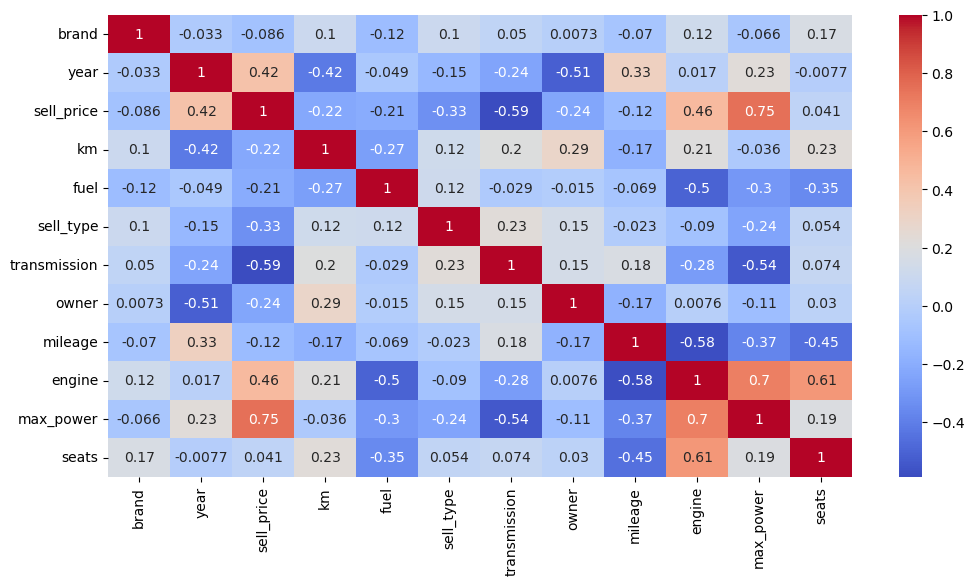

In [125]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm") # used heatmap to see correlation and drop unnecessary column # closer to 1 better

In [126]:
df = df.drop(columns=['year','transmission', 'owner'])  # dropped columns after correlation using correlation sns heatmap
df

,brand,sell_price,km,fuel,sell_type,mileage,engine,max_power,seats
0,20,450000,145500,0,1,23.40,1248.0,74.00,5.0
1,27,370000,120000,0,1,21.14,1498.0,103.52,5.0
2,10,158000,140000,1,1,17.70,1497.0,78.00,5.0
3,11,225000,127000,0,1,23.00,1396.0,90.00,5.0
4,20,130000,120000,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...
8123,11,320000,110000,1,1,18.50,1197.0,82.85,5.0
8124,11,135000,119000,0,1,16.80,1493.0,110.00,5.0
8125,20,382000,120000,0,1,19.30,1248.0,73.90,5.0
8126,28,290000,25000,0,1,23.57,1396.0,70.00,5.0


<Axes: >

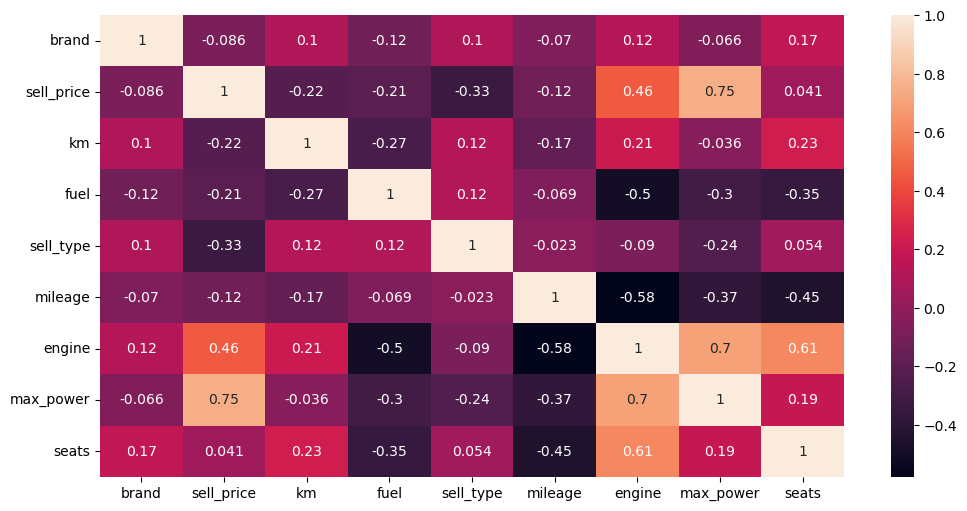

In [127]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)  # annot = annotations in figure

In [128]:
# Feature Engineering

X = df[['brand', 'km', 'fuel', 'sell_type', 'mileage', 'engine', 'seats','max_power']]  # Features/Label/X/Predictor
y = df['sell_price']    # y/Target

In [129]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state= 42) # train_test_split to split data into train test and test size 30% data where random state 42 takes same data everytime it runs

In [130]:
# Preprocessing
# Checking if value is null
X_train[['brand', 'km', 'fuel', 'sell_type', 'mileage', 'engine', 'seats','max_power']].isna().sum()

brand          0
km             0
fuel           0
sell_type      0
mileage      154
engine       154
seats        154
max_power    149
dtype: int64

In [131]:
y_train.isna().sum()

np.int64(0)

In [132]:
X_test.isna().sum()

brand         0
km            0
fuel          0
sell_type     0
mileage      60
engine       60
seats        60
max_power    59
dtype: int64

In [133]:
# since many values null
# adding median outliers
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['seats'].fillna(X_train['seats'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

X_test['mileage'].fillna(X_test['mileage'].median(), inplace=True)
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['seats'].fillna(X_test['seats'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)


In [134]:
X_train[['brand', 'km', 'fuel', 'sell_type', 'mileage', 'engine', 'seats','max_power']].isna().sum()


brand        0
km           0
fuel         0
sell_type    0
mileage      0
engine       0
seats        0
max_power    0
dtype: int64

In [135]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [136]:
# calling outlier function to count outliers
for col in X_train.columns:
    outlier_count(col)


---------------km---------------

Number of outliers: 102
Percent of data that is outlier: 1.82%

---------------sell_type---------------

Number of outliers: 944
Percent of data that is outlier: 16.8%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------seats---------------

Number of outliers: 1158
Percent of data that is outlier: 20.61%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


In [137]:
# # scikit learn preprocessing StandardScaler algorithm used to scale and transform
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)

In [138]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 8)
Shape of X_test:  (2409, 8)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


In [139]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import mlflow
import pandas as pd
import matplotlib.pyplot as plt

class LinearRegression(object):
    
    def __init__(self, regularization, lr=0.001, method='batch', init='xavier', polynomial=True, degree=2,
                 use_momentum=True, momentum=0.5, num_epochs=500, batch_size=50, cv=KFold(n_splits=3)):
        
        # Model Hyperparameters
        self.lr         = lr                     # Learning rate, controls how big of a step the model takes
        self.num_epochs = num_epochs             # Number of times the model will go through the entire dataset
        self.batch_size = batch_size             # Number of samples in each training batch
        self.method     = method                 # Gradient descent method: 'batch', 'mini', 'sto'
        self.polynomial = polynomial             # Whether to use polynomial features
        self.degree     = degree                 # The highest power for polynomial features
        self.init       = init                   # Method for initializing the model's weights: 'zeros', 'xavier'
        self.use_momentum   = use_momentum       # Whether to use momentum to speed up training
        self.momentum   = momentum               # Momentum rate
        self.prev_step  = 0                      # Keeps track of the previous step for momentum calculations
        self.cv         = cv                     # Cross-validation strategy, used to split data into folds
        self.regularization = regularization     # The regularization object (L1, L2, etc.)

        # Model Attributes
        self.theta = None                        # The model's weights, which are learned during training
        self.poly_transformer = None             # Stores the polynomial feature transformer
        self.kfold_scores = []                   # List to store the MSE for each cross-validation fold
        self.kfold_r2 = []                       # List to store the R2 score for each fold
        self.val_loss_old = np.inf               # Used for early stopping
        self.columns = None
        self.feature_names = None

    def mse(self, ytrue, ypred):  # Calculates the Mean Squared Error between true and predicted values
        ytrue = np.array(ytrue).reshape(-1)
        ypred = np.array(ypred).reshape(-1)
        return mean_squared_error(ytrue, ypred)
    
    def r2(self, ytrue, ypred):  # Calculates the R-squared score, which measures how well the model's predictions fit the data
        return r2_score(ytrue, ypred)
    
    def avgMSE(self): # Returns the average MSE across all cross-validation folds
        return np.mean(self.kfold_scores)
    
    def avgr2(self): # Returns the average R-squared score across all cross-validation folds
        return np.mean(self.kfold_r2)
    
    def _init_weights(self, n_features):
        if self.init == "xavier":
            limit = np.sqrt(16.0 / (n_features + 1))
            return np.random.uniform(-limit, limit, size=n_features)
        elif self.init == "zero":
            return np.zeros(n_features)
        else:
            raise ValueError("init must be either 'zero' or 'xavier'")


    def _transform_data(self, X): # Prepares the input data for the model
        if self.polynomial:  # If a transformer doesn't exist yet, we create and fit it to the data
            if self.poly_transformer is None:
                self.poly_transformer = PolynomialFeatures(degree=self.degree, include_bias=False)
                X = self.poly_transformer.fit_transform(X)
            else:
                X = self.poly_transformer.transform(X) # Use the existing transformer to transform the data
        return np.c_[np.ones(X.shape[0]), X]    # We add a bias (intercept) column to the data to allow the model to learn a baseline value
    
    def fit(self, X_train, y_train):        # The main function to train the model on your data
        
        self.kfold_scores = []
        self.kfold_r2 = []
        self.val_loss_old = np.inf

        if isinstance(X_train, pd.DataFrame):
            self.feature_names = X_train.columns.tolist()
            X_train = X_train.values
        else:
            self.feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
            
        if isinstance(y_train, pd.Series):
            y_train = y_train.values
        if self.polynomial and self.poly_transformer is None:                   # We prepare the polynomial features on the entire dataset first, which is more efficient
            self.poly_transformer = PolynomialFeatures(degree=self.degree, include_bias=False)
            X_train_poly = self.poly_transformer.fit_transform(X_train)
        elif self.polynomial:
            X_train_poly = self.poly_transformer.transform(X_train)
        else:
            X_train_poly = X_train

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train_poly)):    # The rest of the logic proceeds with the transformed but not re-scaled data
            X_cross_train, X_cross_val = X_train_poly[train_idx], X_train_poly[val_idx]
            y_cross_train, y_cross_val = y_train[train_idx], y_train[val_idx]
            
            # We add a bias column to both the training and validation sets for the model
            X_cross_train = np.c_[np.ones(X_cross_train.shape[0]), X_cross_train]
            X_cross_val = np.c_[np.ones(X_cross_val.shape[0]), X_cross_val]

            self.theta = self._init_weights(X_cross_train.shape[1])
            self.vel = np.zeros_like(self.theta)
            
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__,
                          "init": self.init, "momentum": self.momentum, "poly_degree": self.degree}
                mlflow.log_params(params=params)

                for epoch in range(self.num_epochs):
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train_shuffled = X_cross_train[perm]
                    y_cross_train_shuffled = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train_shuffled[batch_idx].reshape(1, -1)
                            y_method_train = y_cross_train_shuffled[batch_idx]
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train = X_cross_train_shuffled[batch_idx:batch_idx+self.batch_size]
                            y_method_train = y_cross_train_shuffled[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        train_loss = self._train(X_cross_train_shuffled, y_cross_train_shuffled)
                    
                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val, from_train=True)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2_new = self.r2(y_cross_val, yhat_val)
                    
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="val_r2", value=val_r2_new, step=epoch)

                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
                
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2.append(val_r2_new)
                print(f"Fold {fold}: MSE {val_loss_new}")
                print(f"Fold {fold}: R2: {val_r2_new}")
    
    def _train(self, X, y):
        yhat = X @ self.theta
        m = X.shape[0]

        grad = (1/m) * X.T @ (yhat - y)

        if self.regularization is not None:
            reg_grad = self.regularization.derivation(self.theta).copy()    # Get the gradient from the regularization object
            reg_grad[0] = 0  # don’t regularize bias
            grad += reg_grad # Add the regularization gradient to the main gradient

        if self.use_momentum:   # Update weights with momentum
            self.vel = self.momentum * self.vel + self.lr * grad    # Update velocity
            self.theta = self.theta - self.vel  # Update weights using velocity
        else:
            self.theta = self.theta - self.lr * grad    # Update weights without momentum

        return self.mse(y, yhat)    # Return the training loss for this batch
    
    def predict(self, X, from_train=False): # Makes predictions on new data.
        if not from_train:                  # It handles transforming the data before making a prediction.
            if self.polynomial:
                X = self.poly_transformer.transform(X)  # Transform the data if polynomial features are used
            X = np.c_[np.ones(X.shape[0]), X]       # Add the bias column to the data
            
        return X @ self.theta
     
    def _coef(self):
        return self.theta[1:] # Returns the learned coefficients (weights) of the model, excluding the bias term
    
    def _bias(self):
        return self.theta[0]  # Returns the learned bias (intercept) of the model

    def feature_importance(self, width=5, height=10):
        if self.theta is not None and self.feature_names is not None:
            coefs = pd.DataFrame(
                data=self.theta[1:],  # skip bias
                columns=['Coefficients'],
                index=self.feature_names if not self.polynomial else range(len(self.theta[1:]))
            )
            coefs.plot(kind="barh", figsize=(width, height))
            plt.title("Feature Importance")
            plt.show()
        else:
            print("Coefficients or feature names are not available to create the graph.")

In [140]:
# Defining penalty classes for different regularization techniques
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta) # Derivative of L1 norm is lambda*sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta)) 
        
    def derivation(self, theta):
        return self.l * 2 * theta # Derivative of L2 norm is 2*lambda*theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta)) # L1 part
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta)) # 0.5 factor for L2
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
# Defining subclasses for different regularization techniques    
class Lasso(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Ridge(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class ElasticNet(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

class Normal(LinearRegression):
    def __init__(self, l, lr, method, init, polynomial, degree, use_momentum, momentum):
        self.regularization = None  # No regularization
        super().__init__(self.regularization, lr, method, init, polynomial, degree, use_momentum, momentum)
    def avgMSE(self):
        return np.sum(np.array(self.kfold_scores)) / len(self.kfold_scores)

In [141]:
# scikit learn preprocessing StandardScaler algorithm used to scale and transform
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [142]:
import sys

def str_to_class(classname):    #converts string to class
    return getattr(sys.modules[__name__], classname)

In [143]:
# import mlflow.pyfunc

epochs = 80
regs = ["Ridge", "Lasso", "ElasticNet"]

# Looping through all regression methods
for reg in regs:
    # Specifying the parameters for the model
    params = {"method": "batch", "l": 0.1, "lr": 0.01,  "polynomial": True, "init" :"xavier", 
    "use_momentum" :False,  "momentum":0.5, "degree":1}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}", nested=True)
    
    print("="*5, reg, "="*5) # Printing the name of the regression method being used

    #Specifying the type of regression and setting up the model based on it
    type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
    model = type_of_regression(**params) # Creating the model object

    for epoch in range(1, epochs + 1):
        model.fit(X_train, y_train) # Fitting the model
        #Calculating avgMse and r2 for the speicified params
        mse = model.avgMSE()
        r2 = model.avgr2()

        yhat = model.predict(X_train)  # Predicting on the training data
        
        print("Validation MSE: ", mse)
        print("Validation R2: ", r2)
        # Logging the metrics and model in ml flow
        mlflow.log_metric("train_mse", mse, step=epoch)
        mlflow.log_metric("train_r2", r2, step=epoch)
        # mlflow.pyfunc.log_model("model", python_model=model)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, name='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Fold 0: MSE 273660379387.95435
Fold 0: R2: 0.5940288150629853
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/994780120796082677/runs/84a4afb6e4dc43d0b1512c5f8dbf2bf3
🧪 View experiment at: http://localhost:5000/#/experiments/994780120796082677
Fold 1: MSE 241429380108.47604
Fold 1: R2: 0.6116234029339589
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/994780120796082677/runs/d32166597b4f48a9a6897d3256dc2e3a
🧪 View experiment at: http://localhost:5000/#/experiments/994780120796082677
Fold 2: MSE 242190296403.74548
Fold 2: R2: 0.600327088772582
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/994780120796082677/runs/916c7f8232ed4e98a3e0e6da4676750e
🧪 View experiment at: http://localhost:5000/#/experiments/994780120796082677
Validation MSE:  252426685300.05862
Validation R2:  0.6019931022565087
Fold 0: MSE 273660388772.3858
Fold 0: R2: 0.5940288011413181
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/994780120796082677/runs/402a77f

KeyboardInterrupt: 

In [ ]:
# Setting up the experiment of polynomial and regularization type all others are hard quoted
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]

for reg in regs:
    for t in ispoly:

        params = {"method": "batch","polynomial": t,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
        "degree":2, "use_momentum" :True,  "momentum":0.5}
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}", nested=True)
        
        print("="*5, reg, "="*5)

        type_of_regression = str_to_class(reg)   
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()
        

        print("Validation MSE: ", mse)
        print("Validation R2: ", r2)

        mlflow.log_metric(key="train_mse", value=mse)
        mlflow.log_metric(key="train_r2", value=r2)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, name='model', signature=signature)

    mlflow.end_run()

===== Ridge =====
Fold 0: MSE inf
Fold 0: R2: -inf
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/190877290999588017/runs/691e5146f87b469489404c2a63e329e1
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 1: MSE inf
Fold 1: R2: -inf
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/190877290999588017/runs/73c3e68521d04f0fa04d8d8051c9d8ef
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 2: MSE inf
Fold 2: R2: -inf
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/190877290999588017/runs/bc7bcc26ef9e42519e9ff54e11a3502e
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Validation MSE:  inf
Validation R2:  -inf
===== Ridge =====
Fold 0: MSE 272218695952.0297
Fold 0: R2: 0.5961675314314103
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/190877290999588017/runs/59b35b5efa244797a2a7505f96e0474b
🧪 View experiment at: http://localhost:5000/#/experiments/1908772909995

In [ ]:
reg = "Normal"
ispoly= False
# Only testing with the method here
methods=["mini","batch","sto"]

for method in methods:
    params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :"xavier", 
    "degree":2, "use_momentum" :True,  "momentum":0.5}
    mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}", nested=True)
    
    print("="*5, reg, "="*5)
    print("Method: ", method)

    type_of_regression = str_to_class(reg)    
    model = type_of_regression(**params)  
    model.fit(X_train, y_train)
    yhat = model.predict(X_train)
    mse = model.avgMSE()
    r2 = model.avgr2()

    print("Validation MSE: ", mse)
    print("Validation R2: ", r2)

    mlflow.log_metric(key="train_mse", value=mse)
    mlflow.log_metric(key="train_r2", value=r2)

    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, name='model', signature=signature)

    mlflow.end_run()

===== Normal =====
Method:  mini
Fold 0: MSE 1356491500226.5688
Fold 0: R2: -1.0123353732667106
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/190877290999588017/runs/0b07f4d3d4ae427fbb3dd7a8175f61e8
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 1: MSE 1048997737969.0112
Fold 1: R2: -0.6874755326767956
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/190877290999588017/runs/24475856f1094963923faa3fc8d18b27
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 2: MSE 231194789102.59436
Fold 2: R2: 0.6184723509021073
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/190877290999588017/runs/5c93ceb13ebb4d72abb14a0b65ec2375
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Validation MSE:  878894675766.0581
Validation R2:  -0.36044618501379966
🏃 View run method-mini-lr-0.1-reg-Normal-poly-False at: http://localhost:5000/#/experiments/190877290999588017/runs/387ab2ff0ece468

In [ ]:
reg = "Normal"
ispoly= False
# Only testing with the best performing methods here
methods=["mini", "batch"]
# Testing with/without momentum here
momentums =[True, False]

for method in methods:
    for momentum in momentums:
        params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.01, "init" :"xavier", 
        "degree":2, "use_momentum" :momentum,  "momentum":0.5}
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}", nested=True)    
        print("="*5, reg, "="*5)
        print("Method: ", method)
        print("Momentum: ", momentum)
        print("Inititalization: ", "Xavier")
        print("Learning Rate: ", "0.1")
        print("="*10)

        type_of_regression = str_to_class(reg)    
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()

        print("Validation MSE: ", mse)
        print("Validation R2: ", r2)

        mlflow.log_metric(key="test_mse", value=mse)
        mlflow.log_metric(key="test_r2", value=r2)

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, name='model', signature=signature)

        mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  True
Inititalization:  Xavier
Learning Rate:  0.1
Fold 0: MSE 246601094016.168
Fold 0: R2: 0.6341708705936461
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/190877290999588017/runs/b0d32675187b4084a09f1171ee305202
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 1: MSE 242025412817.63736
Fold 1: R2: 0.6106645918927339
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/190877290999588017/runs/9b5826994c9c4575a90b83ca531bcab1
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 2: MSE 265641815512.4757
Fold 2: R2: 0.5616263767536893
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/190877290999588017/runs/b0c6fca902cc484cb85cad77b87d1998
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Validation MSE:  251422774115.427
Validation R2:  0.6021539464133564
🏃 View run method-mini-lr-0.1-reg-Normal-poly-False-momentum-True at: http://l

In [ ]:
reg = "Normal"
ispoly= False
methods=["mini", "batch"]
momentum =False
inits=["zero",'xavier'] # Testing with different initialization methods here
for method in methods:
    for init in inits:
        params = {"method": method,"polynomial": ispoly,  "lr": 0.1, "l": 0.1, "init" :init, 
        "degree":2, "use_momentum" :momentum,  "momentum":0.9}
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
        
        print("="*5, reg, "="*5)
        print("Method: ", method)
        print("Momentum: ", momentum)
        print("Inititalization: ", init)
        print("Learning Rate: ", "0.1")
        print("="*10)
        type_of_regression = str_to_class(reg)   
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_train)
        mse = model.avgMSE()
        r2 = model.avgr2()
        print("Validation MSE: ", mse)
        print("Validation R2: ", r2)
        mlflow.log_metric(key="train_mse", value=mse)
        mlflow.log_metric(key="train_r2", value=r2)
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, name='model', signature=signature)

        mlflow.end_run()

===== Normal =====
Method:  mini
Momentum:  False
Inititalization:  zero
Learning Rate:  0.1
Fold 0: MSE 261111446176.60934
Fold 0: R2: 0.6126449746141017
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/190877290999588017/runs/56ca2e8c7f4441f88d192ade11af8962
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 1: MSE 236670685375.00137
Fold 1: R2: 0.6192785013574922
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/190877290999588017/runs/07aff9c934884750aa40aa9263e2f304
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 2: MSE 236813990342.5551
Fold 2: R2: 0.6091993017680335
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/190877290999588017/runs/f86a64e819df4d41be88a817e22e8597
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Validation MSE:  244865373964.72192
Validation R2:  0.6137075925798757
🏃 View run method-mini-lr-0.1-reg-Normal-poly-False-momentum-False-init-zer

In [ ]:
regs = ["Ridge", "Lasso", "ElasticNet","Normal"]
ispoly= [True, False]
lrs=[0.01,0.001,0.0001]
methods = ["sto","mini","batch"]
inits =['zero','xavier']
use_momentums =[True, False]
momentum =""
for reg in regs:
    print("="*5, reg, "="*5)
    for method in methods:
        print("="*5, method, "="*5)
        for t in ispoly:
            if t==True:
                print("=====Polynomial=====")
            else:
                print("=====Linear=====")
            for init in inits:
                print("="*5, init, "="*5)
                for use_momentum in use_momentums:
                    if(use_momentum== True):
                         momentum = "Momentum Used"
                    else:
                        momentum ="Momentum not used"
                    print("="*5, momentum, "="*5)
                    for lr in lrs:
                        print("="*5, lr, "="*5)
                        params = {"method": method,"polynomial": t,  "lr": lr, "l": 0.1, "init" :init, 
                        "degree":2, "use_momentum" :use_momentum,  "momentum":0.5}
                        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{t}-momentum-{momentum}-init-{init}", nested=True)                                            
                        type_of_regression = str_to_class(reg)    
                        model = type_of_regression(**params)  
                        model.fit(X_train, y_train)
                        yhat = model.predict(X_train)
                        mse = model.avgMSE()
                        r2 = model.avgr2()

                        print("Validation MSE: ", mse)
                        print("Validation R2: ", r2)

                        mlflow.log_metric(key="train_mse", value=mse)
                        mlflow.log_metric(key="train_r2", value=r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, name='model', signature=signature)


                        mlflow.end_run()

===== Ridge =====
===== sto =====
=====Polynomial=====
===== zero =====
===== Momentum Used =====
===== 0.01 =====
Fold 0: MSE inf
Fold 0: R2: -inf
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/190877290999588017/runs/b44ac1ae3a3a49e7a0c7444605bb081f
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 1: MSE inf
Fold 1: R2: -inf
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/190877290999588017/runs/3911db76c9354f028cdc0243e7644a84
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Fold 2: MSE inf
Fold 2: R2: -inf
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/190877290999588017/runs/ea20952645024f5180155a8f48964f63
🧪 View experiment at: http://localhost:5000/#/experiments/190877290999588017
Validation MSE:  inf
Validation R2:  -inf
🏃 View run method-sto-lr-0.01-reg-Ridge-poly-True-momentum-Momentum Used-init-zero at: http://localhost:5000/#/experiments/190877290999588017/runs/25957061b4d1472eaee62

In [ ]:
# Testing
reg = "Normal"
ispoly= False
methods=["batch"]
momentum = True
# Only testing diff initialization here
inits=["xavier"]
for method in methods:
    for init in inits:
        params = {"method": method,"polynomial": ispoly,  "lr": 0.01, "l": 0.1, "init" :init, 
        "degree":2, "use_momentum" :momentum,  "momentum":0.9}
        mlflow.start_run(run_name=f"method-{params['method']}-lr-{params['lr']}-reg-{reg}-poly-{ispoly}-momentum-{momentum}-init-{init}", nested=True)
        
        print("="*5, reg, "="*5)
        print("Method: ", method)
        print("Momentum: ", momentum)
        print("Inititalization: ", init)
        print("Learning Rate: ", "0.01")
        print("="*10)
        
        type_of_regression = str_to_class(reg)    
        model = type_of_regression(**params)  
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mse  = model.mse(yhat, y_test)
        r2 = model.r2(yhat, y_test)
        
        print("Test MSE: ", mse)
        print("Test R2: ", r2)
        mlflow.log_metric(key="test_mse", value=mse)
        mlflow.log_metric(key="test_r2", value=r2)
        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, name='model', signature=signature)

        mlflow.end_run()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format  # Set to 2 decimal places

pd.DataFrame({'Actual Price:': np.exp(y_test), 'Predicted Price:': np.exp(yhat)})

In [ ]:
plt.figure(figsize=(10,6))

# Scatterplot of actual vs predicted
sns.scatterplot(x=y_test, y=yhat, alpha=0.7, label='Predicted')

# Plot reference line y = x
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', label='Ideal Fit')

plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


In [ ]:
residuals = y_test - yhat

plt.figure(figsize=(12,3))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Distribution of Linear Regression Predictions")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='dashed')
plt.show()

In [ ]:
fi = model.feature_importance(width=12, height=5)  # Display feature importance
print(fi)

In [ ]:
from sklearn.inspection import permutation_importance


# permutation importance
perm_imp = permutation_importance(
    model,            # our model needs to have predict() method
    X_test,
    y_test.values if isinstance(y_test, pd.Series) else y_test,
    n_repeats=10,
    random_state=42,
    scoring='r2'
)

# Create a DataFrame for visualization
perm_df = pd.DataFrame({
    'Feature': model.columns,
    'Importance_Mean': perm_imp.importances_mean,
    'Importance_STD': perm_imp.importances_std
}).sort_values(by='Importance_Mean', ascending=True)

# Plot using bar 
perm_df.plot(kind='bar', x='Feature', y='Importance_Mean', figsize=(12,5), xerr='Importance_STD', legend=True)
plt.title("Permutation Feature Importance")
plt.xlabel("Mean decrease in R²")
plt.show()

In [ ]:
import shap

# create an explainer for linear model
explainer = shap.Explainer(model.predict, X_test if isinstance(X_test, pd.DataFrame) else pd.DataFrame(X_test, columns=model.columns))

# calculate SHAP values
shap_values = explainer(X_test)

# summary plot
shap.summary_plot(shap_values, X_test if isinstance(X_test, pd.DataFrame) else pd.DataFrame(X_test, columns=model.columns))

In [ ]:
import joblib
# Save the model to a file
joblib.dump(model, '../app/model/a2_modelnew.pkl')
joblib.dump(scaler, '../app/model/a2_scalernew.pkl')

In [ ]:
# loading saved models
loaded_model = joblib.load('../app/model/a2_modelnew.pkl')
loaded_scaler = joblib.load('../app/model/a2_scalernew.pkl')

In [ ]:
df.iloc[1]

In [ ]:
df[['brand', 'km', 'fuel', 'sell_type', 'mileage', 'engine', 'seats','max_power']].loc[1]

brand            27.00
km           120000.00
fuel              0.00
sell_type         1.00
mileage          21.14
engine         1498.00
seats             5.00
max_power       103.52
Name: 1, dtype: float64

In [ ]:
sample = np.array([[1,145500,0,1,23.4,1248,5,74]])

In [ ]:
predicted_Car_Price = loaded_model.predict(sample)
predicted_Car_Price

In [ ]:
sample = loaded_scaler.transform(sample)
sample

NameError: name 'load_scaler' is not defined

In [ ]:
predicted_car_price = loaded_model.predict(sample)
np.set_printoptions(precision=2)
print("Predicted Price: ", str(np.exp(predicted_car_price)))